In [ ]:
!pip install numpy opencv-python face-recognition

     |████████████████████████████████| 100.1 MB 19 kB/s 
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566186 sha256=50861d43ae83ede1a16c03d4c6af0dd0068bd75aaf171b7b1510df1059a4a8f1
  Stored in directory: /root/.cache/pip/wheels/d6/81/3c/884bcd5e1c120ff548d57c2ecc9ebf3281c9a6f7c0e7e7947a
Successfully built face-recognition-models


In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [ ]:
img = cv2.imread('/content/001_00.png')
img2 = cv2.imread('/content/002_00.png')

In [ ]:
print(type(img)) #<class 'numpy.ndarray'>
print(type(img[0,0]))  #<class 'numpy.ndarray'>
print(img.dtype)  #int, unsigned int8 -> np.unit9 -> char 0-255
print(img.shape) #(600,600,3) -> (h, v, channel) (R,G,B). -> (B,G,R)

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
uint8
(256, 256, 3)


In [ ]:
print(type(img2)) #<class 'numpy.ndarray'>
print(type(img2[0,0]))  #<class 'numpy.ndarray'>
print(img2.dtype)  #int, unsigned int8 -> np.unit9 -> char 0-255
print(img2.shape) #(600,600,3) -> (h, v, channel) (R,G,B). -> (B,G,R)

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
uint8
(256, 256, 3)


In [ ]:
img[255,255,0]

255

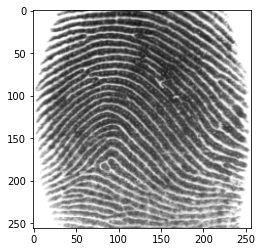

In [ ]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

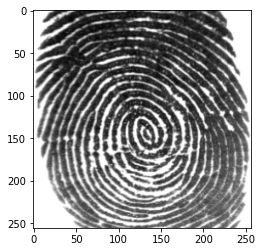

In [ ]:
plt.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))
img2_gray = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

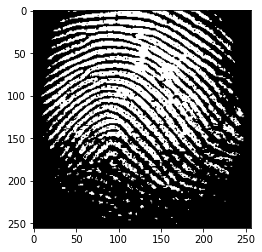

In [ ]:
#image를 행렬로 만들기
img_zero = np.zeros((256,256), dtype=np.uint8)
img_zero[img_gray > 90] = 255

img_src = 255 - img_zero

plt.imshow(img_src, cmap='gray')

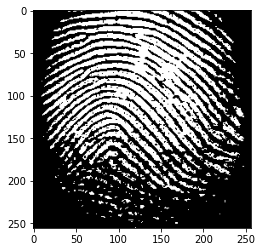

In [ ]:
ret, img_zero = cv2.threshold(img_gray, 95, 255, cv2.THRESH_BINARY)
# t, img_threshold = cv2.threshold(img_src, -1, 255,  cv2.THRESH_BINARY | cv2.THRESH_OTSU)

img_src = 255 - img_zero
plt.imshow(img_src, cmap='gray')

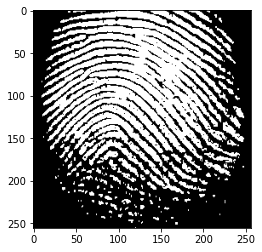

In [ ]:
img_dil = cv2.dilate(img_src, (10, 10), iterations=1)

plt.imshow(img_dil, cmap='gray')

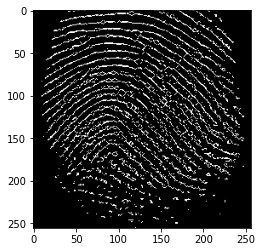

In [ ]:
# Step 1: Create an empty skeleton
size = np.size(img_src)
skel = np.zeros(img_src.shape, np.uint8)

# Get a Cross Shaped Kernel
element = cv2.getStructuringElement(cv2.MORPH_CROSS, (3,3))

# Repeat steps 2-4
while True:
    #Step 2: Open the image
    open = cv2.morphologyEx(img_src, cv2.MORPH_OPEN, element)
    #Step 3: Substract open from the original image
    temp = cv2.subtract(img_src, open)
    #Step 4: Erode the original image and refine the skeleton
    eroded = cv2.erode(img_src, element)
    skel = cv2.bitwise_or(skel,temp)
    img_src = eroded.copy()
    # Step 5: If there are no white pixels left ie.. the image has been completely eroded, quit the loop
    if cv2.countNonZero(img_src)==0:
        break


plt.imshow(skel, cmap='gray')

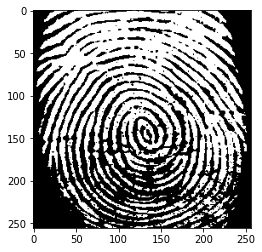

In [ ]:
#image를 행렬로 만들기
img2_zero = np.zeros((256,256), dtype=np.uint8)
img2_zero[img2_gray > 100 ] = 255

img2_src = 255 - img2_zero

plt.imshow(img2_src, cmap='gray')

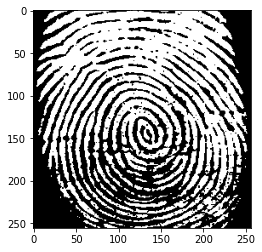

In [ ]:
# t2, img2_threshold = cv2.threshold(img2_gray, -1, 255,  cv2.THRESH_BINARY | cv2.THRESH_OTSU)

ret, img2_threshold = cv2.threshold(img2_gray, 105, 255, cv2.THRESH_BINARY)
img2_src = 255 - img2_threshold
plt.imshow(img2_src, cmap='gray')

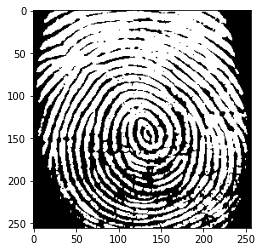

In [ ]:
#morphological transform

#검정색 노이즈 제거
img2_dil = cv2.dilate(img2_src, (10, 10), iterations=1)

plt.imshow(img2_dil, cmap='gray')

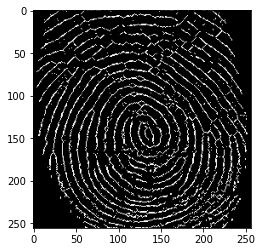

In [ ]:
# Step 1: Create an empty skeleton
size = np.size(img2_dil)
skel = np.zeros(img2_dil.shape, np.uint8)

# Get a Cross Shaped Kernel
element = cv2.getStructuringElement(cv2.MORPH_CROSS, (3,3))

# Repeat steps 2-4
while True:
    #Step 2: Open the image
    open = cv2.morphologyEx(img2_dil, cv2.MORPH_OPEN, element)
    #Step 3: Substract open from the original image
    temp = cv2.subtract(img2_dil, open)
    #Step 4: Erode the original image and refine the skeleton
    eroded = cv2.erode(img2_dil, element)
    skel = cv2.bitwise_or(skel,temp)
    img2_dil = eroded.copy()
    # Step 5: If there are no white pixels left ie.. the image has been completely eroded, quit the loop
    if cv2.countNonZero(img2_dil)==0:
        break


plt.imshow(skel, cmap='gray')